# Students performance in exams

# Aim
To understand the influence of various factors like economic, personal and social on the students performance¶
Inferences would be :
1. How to imporve the students performance in each test ?
2. What are the major factors influencing the test scores ?
3. Effectiveness of test preparation course?
4. Other inferences

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 Let us initialize the required values ( we will use them later in the program )
 we will set the minimum marks to 45 to pass in a exam

In [11]:
passmark = 40

In [6]:
# Let us read the data from the csv file

data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Describe the dataset
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# Let us check for any missing values¶
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Exploring the data

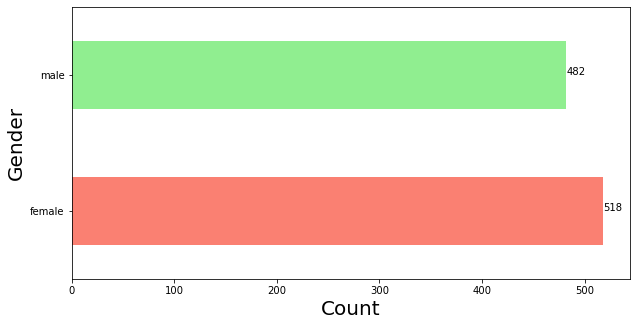

In [20]:
import klib

# Plot gender
plt.figure(figsize=(10,5))
data.gender.value_counts().plot(kind='barh',color=['salmon', 'lightgreen'])
plt.xlabel('Count', fontsize=20)
plt.ylabel('Gender', fontsize=20)

y = data.gender.value_counts()

for index, count in enumerate(y):
    plt.text(count, index,
             str(count))

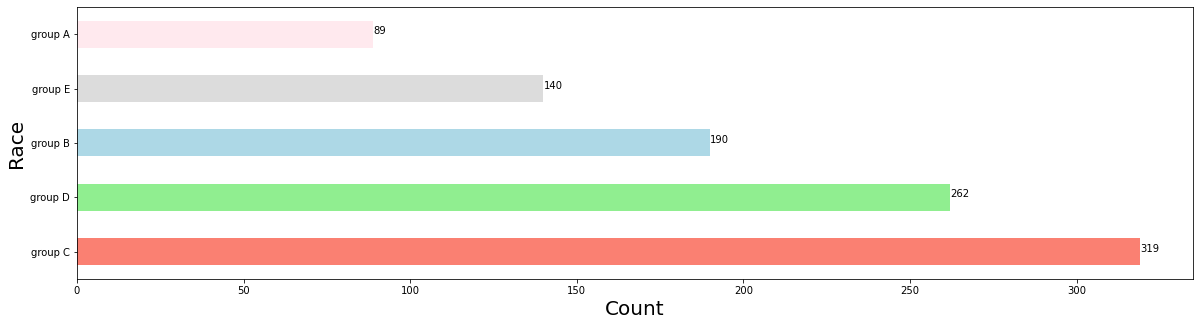

In [21]:
plt.figure(figsize=(20,5))
data['race/ethnicity'].value_counts().plot(kind='barh',color=['salmon', 'lightgreen', 'lightblue', 'Gainsboro', '#FFE9EE'])
plt.xlabel('Count', fontsize=20)
plt.ylabel('Race', fontsize=20)

y = data['race/ethnicity'].value_counts()

for index, count in enumerate(y):
    plt.text(count, index,
             str(count))

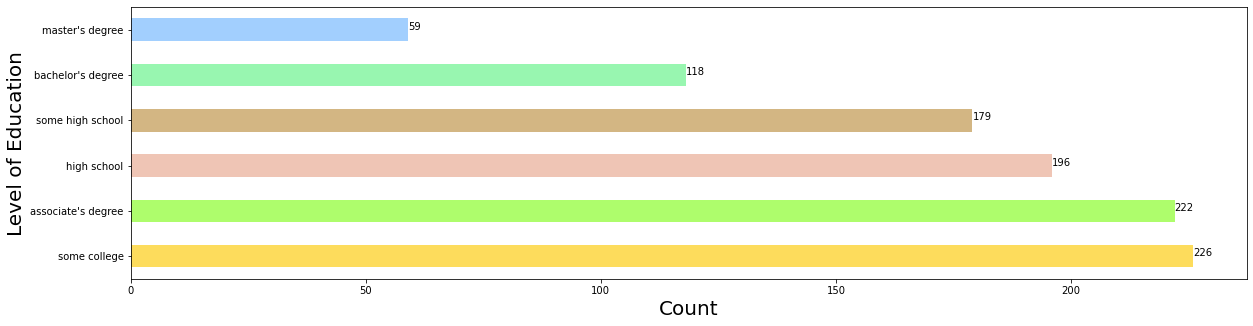

In [22]:
plt.figure(figsize=(20,5))
data['parental level of education'].value_counts().plot(kind='barh', color=['#fddc5c','#aefd6c','#efc5b5','#d3b683','#98f6b0','#a2cffe'])
plt.xlabel('Count', fontsize=20)
plt.ylabel('Level of Education', fontsize=20)

y = data['parental level of education'].value_counts()

for index, count in enumerate(y):
    plt.text(count, index,
             str(count))
plt.show()

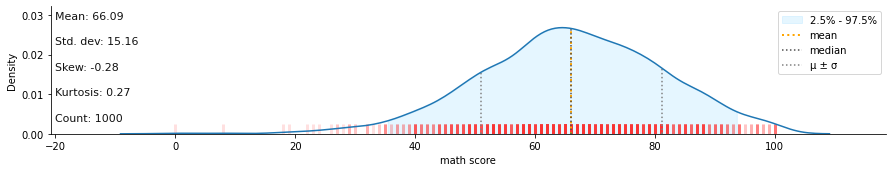

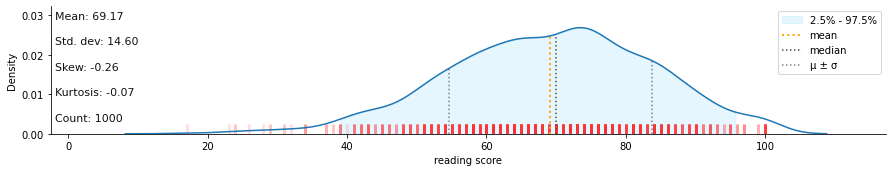

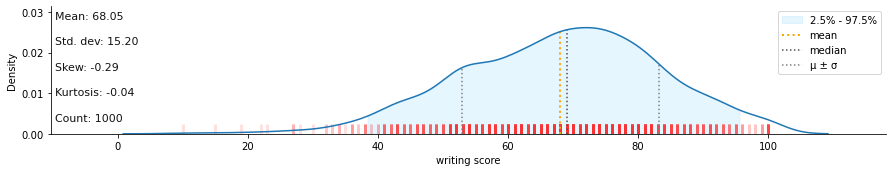

In [23]:
klib.dist_plot(data);

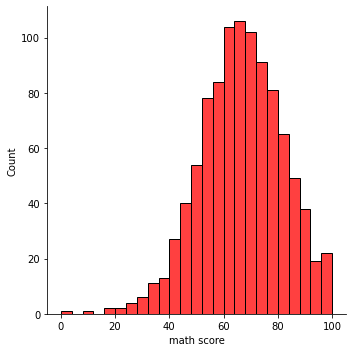

In [24]:
sns.displot(data['math score'], color='red');

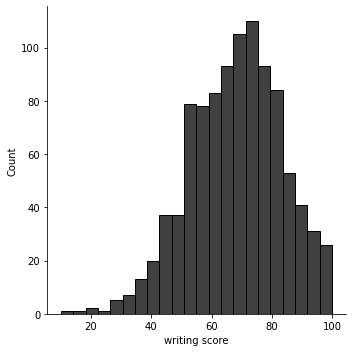

In [25]:
sns.displot(data['writing score'],color='black');

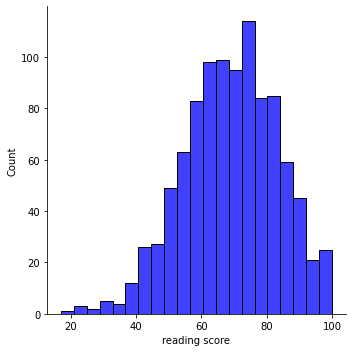

In [26]:
sns.displot(data['reading score'], color='blue');

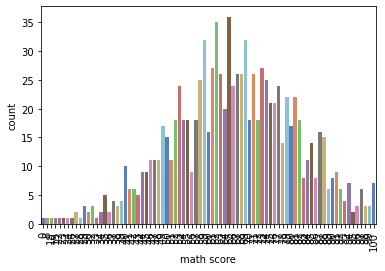

In [9]:
# Let us explore the Math Score first¶
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [12]:
# How many students passed in Math exam ?
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

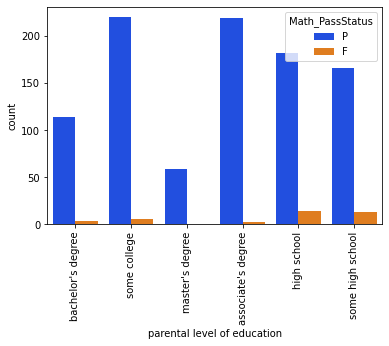

In [13]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

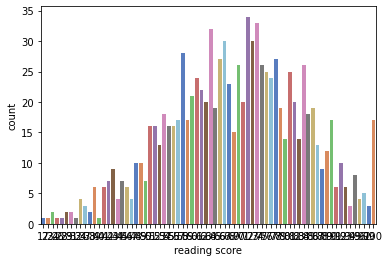

In [14]:
# Let us explore the Reading score
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

In [15]:
# How many studends passed in reading ?
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

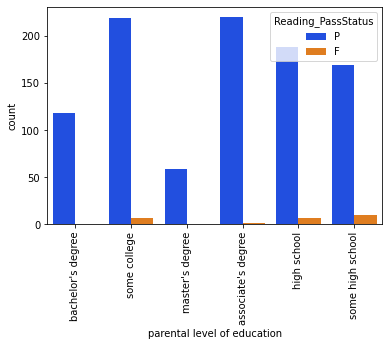

In [16]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

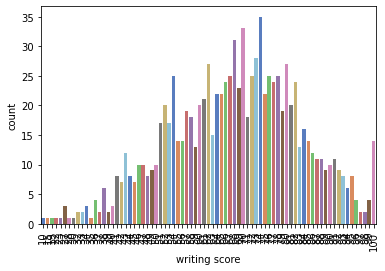

In [17]:
# Let us explore writing score¶
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [18]:
# How many students passed writing ?
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

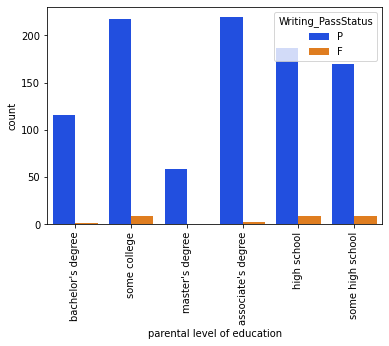

In [19]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [27]:
# Iet us check "How many students passed in all the subjects ?"¶
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

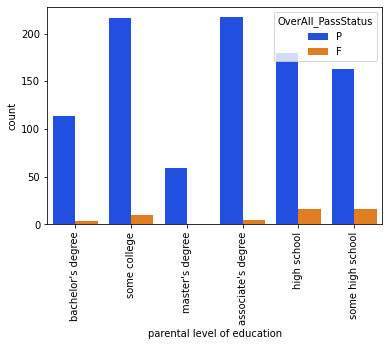

In [28]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 